# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"../../data/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Visualizacion

In [18]:
#Obtenemos los datos del dataset para predecir el precio de una casa en base al area, cuartos y banios
X = df[["area","bedrooms","bathrooms"]].values
y = df["price"].values
print(X.shape,y.shape)

(545, 3) (545,)


In [19]:
#Nos quedamos solo con la variable "area" para un ejemplo puntual
X_area = X[:,0]
print(X_area.shape,y.shape)

(545,) (545,)


In [20]:
#Cambiamos la forma de la matriz para que pueda ser usada en la regresion
X_area = X_area.reshape(-1,1)
print(X_area.shape)

(545, 1)


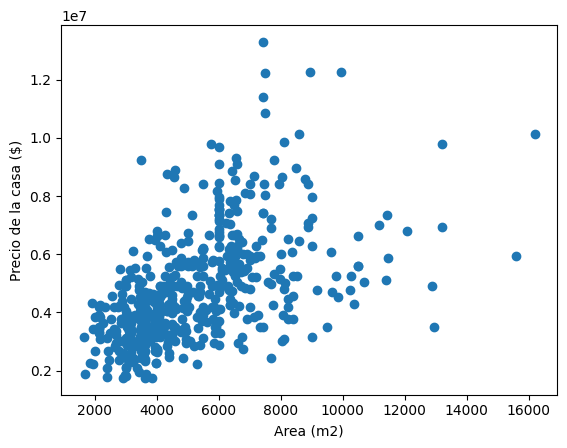

In [21]:
#Cambiamos la forma de la matriz para que pueda ser usada en la regresion
plt.scatter(X_area, y)
plt.ylabel("Precio de la casa ($)")
plt.xlabel("Area (m2)")
plt.show()

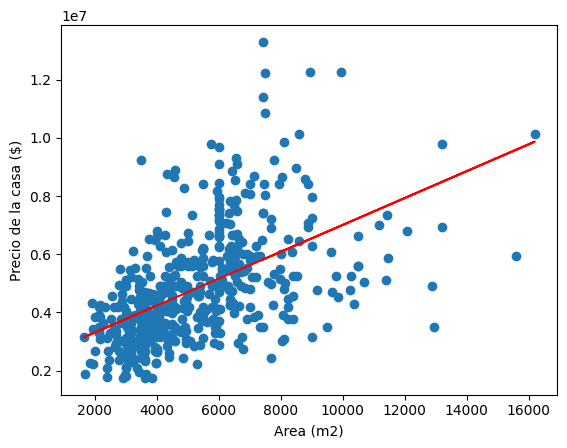

In [22]:
# Creamos una regresion, predecimos los valores y mostramos sobre el scatter la linea de regresion
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_area, y)
predictions = reg.predict(X_area)

plt.scatter(X_area, y)
plt.plot(X_area, predictions,color="red")
plt.ylabel("Precio de la casa ($)")
plt.xlabel("Area (m2)")
plt.show()

# Regression mechanics

$\Large { y = ax + b}$
- La regresion simple solo una una variable predictora
    - y = target
    - x = single feature
    - a,b = parametros o coeficientes

- Como se calculan los valores de a y b?
    - Se define una funcion de error para una linea dada
    - Se elige la linea que minimiza la funcion de error
- Error function = loss function = costfunction


# Multiple Regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)


# Metrics

## R2 = Coeficiente de determinacion

- Es una metrica estadistica que nos dice que tan bien una linea de regresion aproxima la data. El resultado va de 0 a 1, siendo mas cercano a 1 un mejor valor.
- El coeficiente de determinación es una medida utilizada para explicar cuánta variabilidad de un factor puede ser causada por su relación con otro factor relacionado.
- El coeficiente de corelacion de person (r) tiene relacion con R2

$\Large R^{2} = \frac{\textrm{sum squared regression (SSR)}}{\textrm{total sum of squares (SST)}}$

$\Large R^{2} = \frac{ \displaystyle\sum_{}^{} (y_i - \hat{y_i}) }{\displaystyle\sum_{}^{} (y_i - \bar{y_i})}$

In [25]:
#Caluculo de R2 con scikit learn
reg_all.score(X_test, y_test)

0.44736815556478504

## MSE (Mean Squared Error) y RMSE (Root Mean Squared Error)

$\Large MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i}) $

MSE es medido en las unidades del target, al cuadrado

$\Large RMSE = \sqrt{MSE} $

RMSE se mida en las mismas unidades del target

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

1542675.8954301826

# Cross Validation

- El performance del modelo depende de como se haya divido la data en train y test
- Seria ideal encontrar la forma de poder probar el modelo con distintas particiones de la data
- Cross Validation permite exactamente lo solicitado en el punto anterior

In [27]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [28]:
# Resultados R2 en cada iteracion
print(cv_results)

[0.50522921 0.37580771 0.4888971  0.32439977 0.4686285  0.5326231 ]


In [29]:
# Media y Desviacion Estandar de los 6 resultados
print(np.mean(cv_results), np.std(cv_results))

0.4492642318644983 0.07417716588588344


In [31]:
# Intervalo de confianza al 95%
print(np.quantile(cv_results, [0.025, 0.975]))

[0.33082577 0.52919886]


# Regularizacion

- Es una tecnica para evitar el overfiting (sobreajuste) en un modelo de regresion
- Linear Regression minimiza la *funcion de perdida* (loss function) para calcular los coeficientes a y b
- Coeficientes "a" y "b" grandes pueden conducir a un sobreajuste
- Es una buena practica modificar la *funcion de perdida* de manera que se pueda penalizar los coeficientes grandes, esto es llamado Regularizacion.

## Ridge Regression

OLS = Ordinary Least Squares

$\Large {\textrm{Loss Function} = \textrm{OLS Loss Function} + \alpha * \sum_{i=1}^{n}a_i^2}$

- Ridge penaliza coeficientes extremos positivos o negativos (porque los eleva al cuadrado)
- alpha = es un parametro que tenemos que elegir
- alpha es un hiperparametro para optimizar el modelo
- alpha controla la complejidad del modelo
    - alpha = 0 = OLS (Puede terminar en overtifing)
    - alpha alto = Puede terminar en underfiting

In [32]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

print(scores)


[0.44737610576751574, 0.44742584612837955, 0.44625861788003074, 0.40666932623180885, 0.3022059656249201]


## Lasso

- Lasso nos puede apoyar para seleccionar a los features mas importantes del dataset
- Lasso reduce los features con menos importancia a 0
- Features que no se reducen a cero son seleccionados por lasso

In [34]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

print(scores)


[0.4473681554178758, 0.44736814087245647, 0.4473680085121672, 0.4473678611719293, 0.4473674174268658]


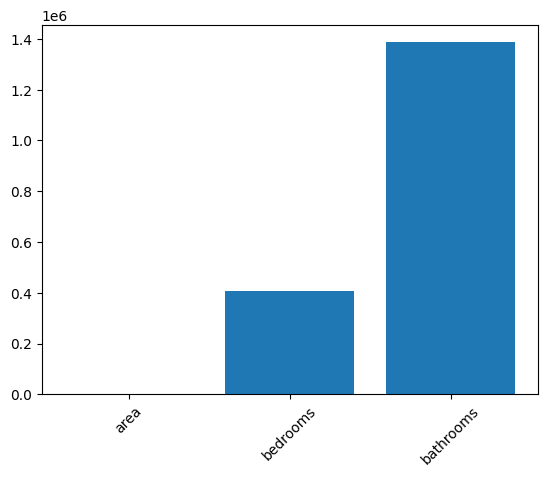

In [38]:
from sklearn.linear_model import Lasso
X = df[["area","bedrooms","bathrooms"]].values
y = df["price"].values
names = df[["area","bedrooms","bathrooms"]].columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()